<a href="https://colab.research.google.com/github/fiftybucks101/SVM/blob/main/Exercise_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [258]:
df = sns.load_dataset('exercise')
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [259]:
kind = df['kind'].unique()
kind

['rest', 'walking', 'running']
Categories (3, object): ['rest', 'walking', 'running']

In [260]:
# Basic exploration and understanding

df['kind'].value_counts()

kind
rest       30
walking    30
running    30
Name: count, dtype: int64

In [261]:
df['diet'].value_counts()

diet
no fat     45
low fat    45
Name: count, dtype: int64

In [262]:
df['time'].value_counts()

time
1 min     30
15 min    30
30 min    30
Name: count, dtype: int64

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(3), int64(3)
memory usage: 2.9 KB


In [264]:
# check if some null values

df.isnull().sum()

Unnamed: 0    0
id            0
diet          0
pulse         0
time          0
kind          0
dtype: int64

**No null values**

In [265]:
# unnamed and id are unnecessary, so removing them

df = df.drop(columns=['Unnamed: 0','id'])
df

,diet,pulse,time,kind
0,low fat,85,1 min,rest
1,low fat,85,15 min,rest
2,low fat,88,30 min,rest
3,low fat,90,1 min,rest
4,low fat,92,15 min,rest
...,...,...,...,...
85,no fat,135,15 min,running
86,no fat,130,30 min,running
87,no fat,99,1 min,running
88,no fat,111,15 min,running


<Axes: xlabel='pulse', ylabel='Count'>

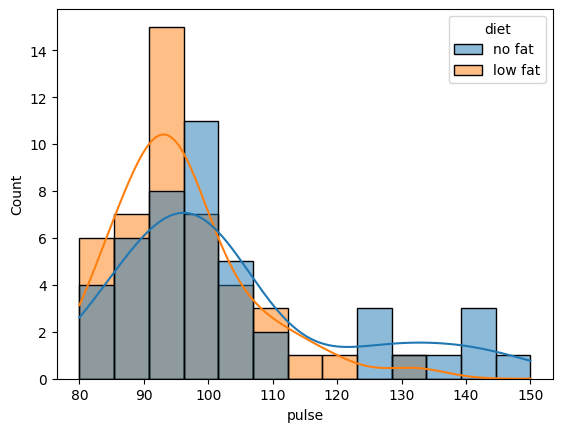

In [266]:
# visulaization of distribution of pulse

sns.histplot(data=df,x='pulse',kde=True,hue='diet')



1.   Higher Pulse Rate = No Fat Diet
2.   Lower Pulse Rate = Low Fat Diet
3.   High Pulse Rate Density Range = 90 - 100



In [267]:
df.head()

,diet,pulse,time,kind
0,low fat,85,1 min,rest
1,low fat,85,15 min,rest
2,low fat,88,30 min,rest
3,low fat,90,1 min,rest
4,low fat,92,15 min,rest


In [268]:
# encoding dataset

df['diet'] = df['diet'].map({'low fat': 1, 'no fat': 2})
df['time'] = df['time'].map({'1 min':1,'15 min':15,'30 min':30})
df['kind'] = df['kind'].map({'rest':1,'walking':2,'running':3})

In [269]:
df['kind'].value_counts()

kind
1    30
2    30
3    30
Name: count, dtype: int64

In [270]:
df.head()

,diet,pulse,time,kind
0,1,85,1,1
1,1,85,15,1
2,1,88,30,1
3,1,90,1,1
4,1,92,15,1


In [271]:
 df.corr()

,diet,pulse,time,kind
diet,1.000000e+00,0.253419,-1.000070e-17,1.812987e-16
pulse,2.534192e-01,1.000000,3.104076e-01,6.143008e-01
time,-1.000070e-17,0.310408,1.000000e+00,-6.124155e-17
kind,1.812987e-16,0.614301,-6.124155e-17,1.000000e+00


In [272]:
# seperating dependent and independent variable
X = df.iloc[:,0:3]
y = df.iloc[:,-1]

In [273]:
# train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)


In [274]:
X_train.shape

(54, 3)

In [275]:
# Scaling data using standard scaler

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [276]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [277]:
y_pred = svc.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy Score = ",accuracy_score(y_test,y_pred))

Accuracy Score =  0.4722222222222222


In [278]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.36      0.33      0.35        12
           2       0.29      0.17      0.21        12
           3       0.61      0.92      0.73        12

    accuracy                           0.47        36
   macro avg       0.42      0.47      0.43        36
weighted avg       0.42      0.47      0.43        36



<Axes: >

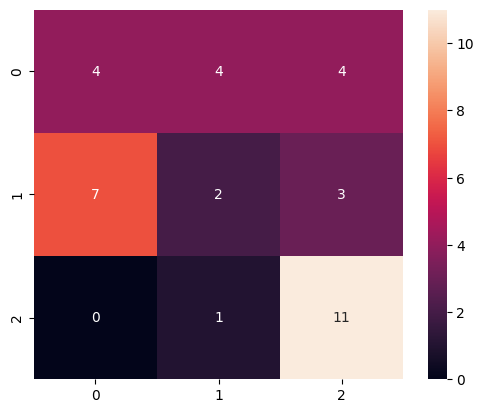

In [279]:
# sns heatmap for confusion matrix

confuse_test = confusion_matrix(y_test,y_pred)
sns.heatmap(confuse_test,square=True,annot=True)

In [280]:
# Training Accuracy Result
y_train_pred = svc.predict(X_train)
print("Accuracy Score = ",accuracy_score(y_train,y_train_pred))

Accuracy Score =  0.6481481481481481


In [281]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           1       0.67      0.67      0.67        18
           2       0.53      0.56      0.54        18
           3       0.76      0.72      0.74        18

    accuracy                           0.65        54
   macro avg       0.65      0.65      0.65        54
weighted avg       0.65      0.65      0.65        54



<Axes: >

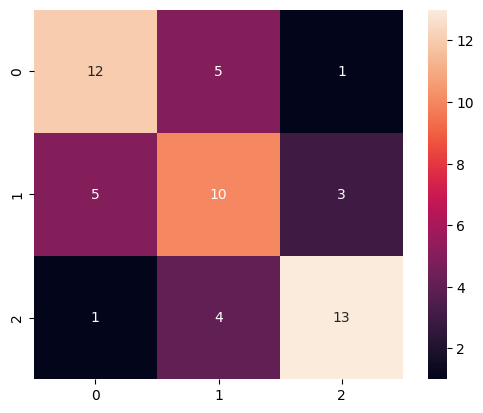

In [282]:
confuse_train = confusion_matrix(y_train,y_train_pred)
sns.heatmap(confuse_train,square=True,annot=True)

In [283]:
# Let's train our data with hyper parameter tuining
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.1,0.5,0.01,1,1.5,2,2.5,3,4,5,6,8,10,15],'kernel':['linear','poly','rbf','sigmoid'],'degree':[0.01,0.1,0.5,1,2,3,4,5,6],'gamma':['scale','auto']}


In [284]:
svm_classifier = GridSearchCV(svc,param_grid=parameters,scoring='accuracy',cv=10)

In [285]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
svm_classifier.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 0.01, 1, 1.5, 2, 2.5, 3, 4, 5, 6, 8,
                               10, 15],
                         'degree': [0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [286]:
print(svm_classifier.best_params_)

{'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [287]:
print(svm_classifier.best_score_)

0.6000000000000001


In [288]:
new_y_pred = svm_classifier.predict(X_test)

print("Accuracy after hyperparameter tuining = " , accuracy_score(y_test,new_y_pred))

Accuracy after hyperparameter tuining =  0.5277777777777778


In [289]:
df.sample(10)

,diet,pulse,time,kind
50,2,90,30,2
78,2,100,1,3
45,2,84,1,2
58,2,104,15,2
20,2,90,30,1
54,2,97,1,2
40,1,96,15,2
52,2,96,15,2
32,1,84,30,2
39,1,95,1,2


In [290]:
def predict(n):
  pred = svm_classifier.predict(n)
  print('pred = ',pred)

  for i, j in enumerate(kind):
    if pred == i+1:
      print(i)
      print('Kind = ',j)

In [291]:
predict([[2,83,15]])

pred =  [3]
2
Kind =  running


In [292]:
predict([[1,98,15]])

pred =  [3]
2
Kind =  running


In [293]:
predict([[2,100,30]])

pred =  [3]
2
Kind =  running


In [294]:
predict([[1,75,1]])

pred =  [3]
2
Kind =  running


In [295]:
predict([[2,100,30]])

pred =  [3]
2
Kind =  running


In [296]:
predict([[0,50,30]])

pred =  [3]
2
Kind =  running
